In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print("CIFAR-100 Training images shape",cifar100_train_images.shape)
print("CIFAR-100 Training labels shape",cifar100_train_labels.shape)
print("CIFAR-100 Test images shape",cifar100_test_images.shape)
print("CIFAR-100 Test labels shape",cifar100_test_labels.shape)

CIFAR-100 Training images shape (50000, 32, 32, 3)
CIFAR-100 Training labels shape (50000, 1)
CIFAR-100 Test images shape (10000, 32, 32, 3)
CIFAR-100 Test labels shape (10000, 1)


In [4]:
train_images = cifar100_train_images / 255.0
test_images = cifar100_test_images / 255.0

In [6]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

In [8]:
train_labels_oh = keras.utils.to_categorical(cifar100_train_labels, 100)
test_labels_oh = keras.utils.to_categorical(cifar100_test_labels, 100)

In [9]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_oh.shape)
print("Testing labels shape:", test_labels_oh.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


In [11]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(100, activation="softmax")
])

ann_model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       100,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,320,100 (47.00 MB)

 Trainable params: 12,320,100 (47.00 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=34, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(100, activation="softmax")
])

cnn_model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 34)     │           952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 34)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        19,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,620 (682.11 KB)

 Trainable params: 174,620 (682.11 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
es = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="max", patience=5,
    restore_best_weights=True)

model_checkpoints_ann = keras.callbacks.ModelCheckpoint(
    filepath="ann_cifar100.weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min")

print('Training ANN model....')
ann_history = ann_model.fit(
    train_images,
    train_labels_oh,
    epochs=10,
    validation_split=0.2,
    callbacks=[es, model_checkpoints_ann])
print('Training ANN model completed')

Training ANN model....
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 98ms/step - accuracy: 0.0499 - loss: 4.3538 - val_accuracy: 0.1097 - val_loss: 3.9135
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 94ms/step - accuracy: 0.1205 - loss: 3.8381 - val_accuracy: 0.1401 - val_loss: 3.7312
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 91ms/step - accuracy: 0.1571 - loss: 3.6401 - val_accuracy: 0.1653 - val_loss: 3.6123
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 92ms/step - accuracy: 0.1822 - loss: 3.5107 - val_accuracy: 0.1717 - val_loss: 3.5572
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.1954 - loss: 3.4337 - val_accuracy: 0.1848 - val_loss: 3.5094
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 97ms/step - accuracy: 0.2115 - loss: 3.3583 - val_accuracy: 0.1897 - val_loss: 3.4564
Training ANN model completed


In [16]:
model_checkpoints_ann = keras.callbacks.ModelCheckpoint(
    filepath="cnn_cifar100.weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min")

print('Training CNN model....')
ann_history = cnn_model.fit(
    train_images,
    train_labels_oh,
    epochs=10,
    validation_split=0.2,
    callbacks=[es, model_checkpoints_ann])
print('Training CNN model completed')

Training CNN model....
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 46ms/step - accuracy: 0.0136 - loss: 4.5979 - val_accuracy: 0.0329 - val_loss: 4.5370
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.0362 - loss: 4.4491 - val_accuracy: 0.0688 - val_loss: 4.1839
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.0757 - loss: 4.1054 - val_accuracy: 0.0965 - val_loss: 3.9699
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.1061 - loss: 3.9110 - val_accuracy: 0.1258 - val_loss: 3.8295
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.1356 - loss: 3.7644 - val_accuracy: 0.1508 - val_loss: 3.7088
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.1569 - loss: 3.6467 - val_accuracy: 0.1672 - val_loss: 3.6031
Training CNN model completed


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.1917 - loss: 3.4438
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1710 - loss: 3.5853


/tmp/ipython-input-306756156.py:34: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


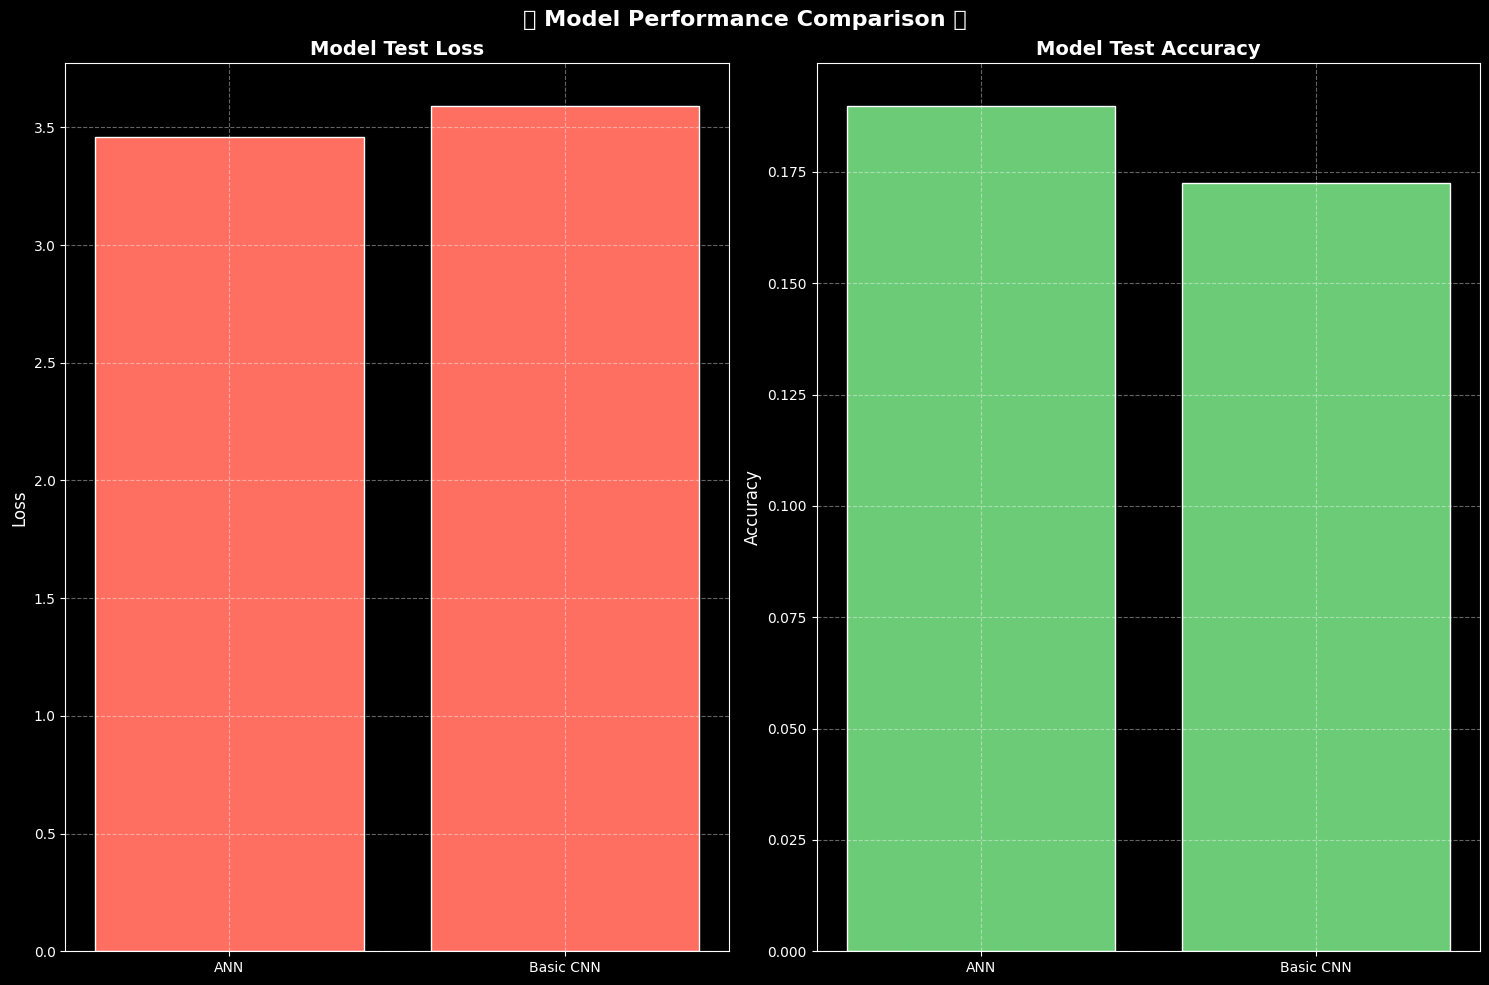

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights("ann_cifar100.weights.h5")
cnn_model.load_weights("cnn_cifar100.weights.h5")

loss_ann, acc_ann = ann_model.evaluate(test_images, test_labels_oh)
loss_cnn, acc_cnn = cnn_model.evaluate(test_images, test_labels_oh)

import matplotlib.pyplot as plt
import numpy as np

models = ['ANN', 'Basic CNN', ]
losses = [loss_ann, loss_cnn]
accuracies = [acc_ann, acc_cnn]

plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


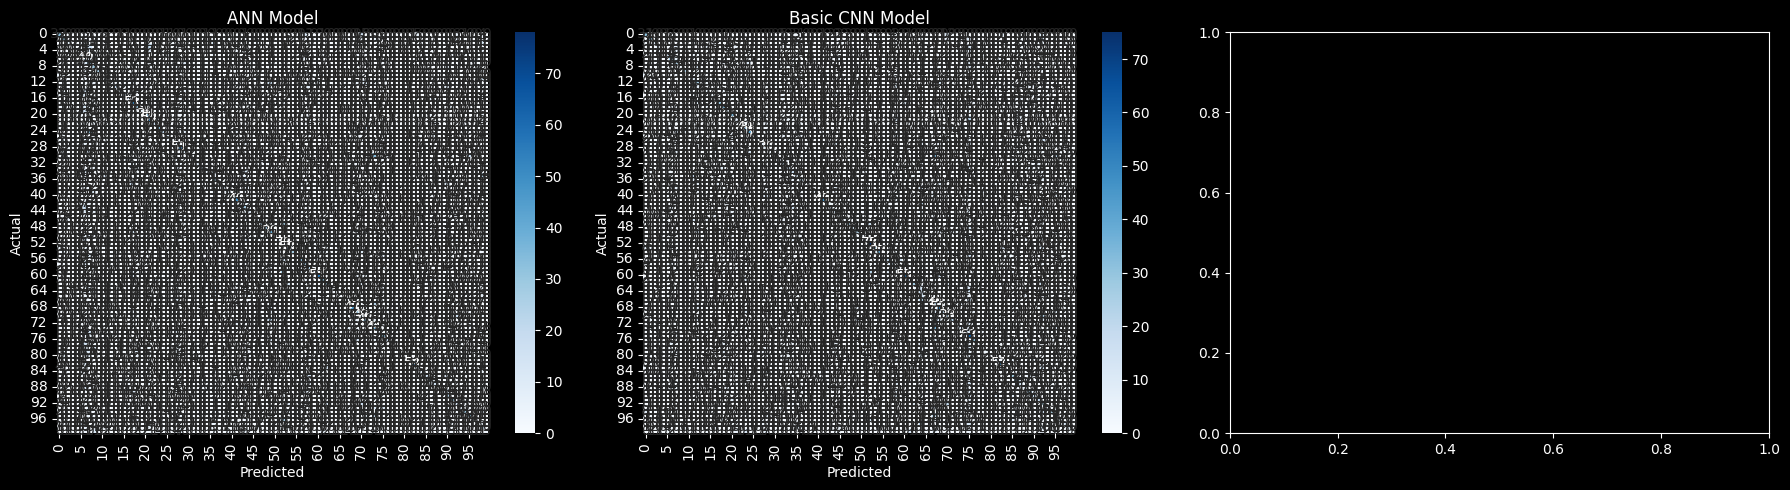

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_oh, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/tmp/ipython-input-473694060.py:47: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


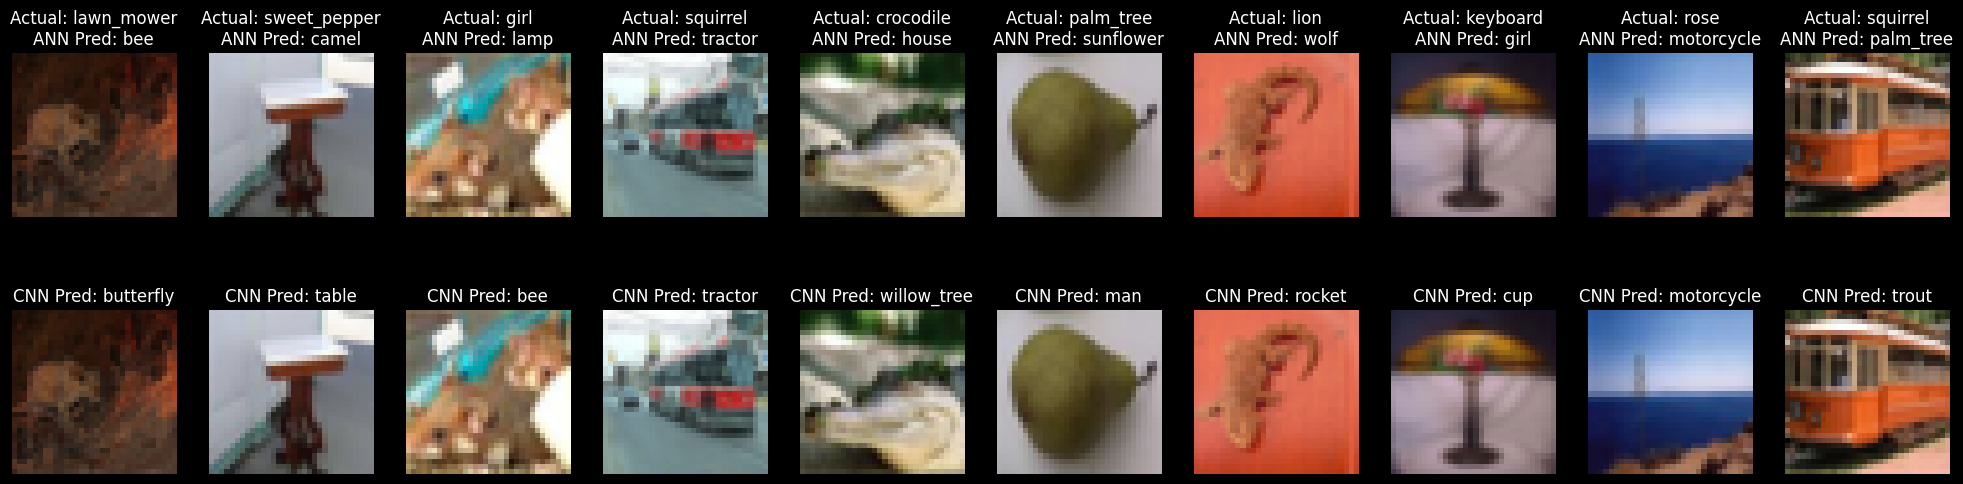

In [23]:
# Get the class names for CIFAR-100
cifar100_class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'fern', 'finch', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Select a few random test images
num_images_to_display = 10
random_indices = np.random.choice(len(test_images), num_images_to_display)

# Get predictions for the selected images
ann_sample_predictions = ann_model.predict(test_images[random_indices])
cnn_sample_predictions = cnn_model.predict(test_images[random_indices])

# Get the predicted labels
ann_predicted_labels = np.argmax(ann_sample_predictions, axis=1)
cnn_predicted_labels = np.argmax(cnn_sample_predictions, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels_oh[random_indices], axis=1)

# Display the images with predictions
plt.figure(figsize=(25, 15))
for i, idx in enumerate(random_indices):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"Actual: {cifar100_class_names[actual_labels[i]]}\nANN Pred: {cifar100_class_names[ann_predicted_labels[i]]}")
    plt.axis('off')

    plt.subplot(4, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(test_images[idx])
    plt.title(f"CNN Pred: {cifar100_class_names[cnn_predicted_labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

The poor accuracy of the models on the CIFAR-100 dataset is likely due to these factors:

Dataset Complexity: CIFAR-100 is a challenging dataset with 100 classes, which makes classification more difficult compared to datasets with fewer classes (like CIFAR-10, which has 10 classes). The images are also low resolution (32x32 pixels), which limits the amount of detail available for the models to learn from.
Model Architecture: The ANN model is a simple feedforward neural network that flattens the image data, losing spatial information that is crucial for image classification. The basic CNN model is also relatively simple with only two convolutional layers. More complex CNN architectures with more layers, filters, and different types of layers (e.g., batch normalization, dropout) are generally required to achieve higher accuracy on CIFAR-100.
Training: The models were trained for only 10 epochs with a simple SGD optimizer. Training for more epochs with a more sophisticated optimizer (like Adam or RMSprop) and potentially using techniques like learning rate scheduling could improve performance.
Regularization: Lack of regularization techniques like dropout or weight decay can lead to overfitting, especially on complex datasets.